Initial setup and first topic model run

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [4]:
RC = mk.RecordCollection("tmp/filtered_corpora.txt")
filtered_corpora_df = wosis.rc_to_df(RC)

In [5]:
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']
filtered_corpora_df.loc[:, ~filtered_corpora_df.columns.isin(hide_columns)].head() 

,year,title,copyright,AU,SO
0,2003,Numerical treatment of stochastic river qualit...,,"Stijnen, JW|Heemink, AW|Ponnambalam, K",WATER RESOURCES RESEARCH
1,2009,Life cycle assessment study of a Chinese deskt...,Crown Copyright (C) 2008 Published by Elsevie...,"Duan, Huabo|Eugster, Martin|Hischier, Roland|S...",SCIENCE OF THE TOTAL ENVIRONMENT
2,2016,Approximate analysis of three-dimensional grou...,,"Huang, C. -S.|Chen, J. -J.|Yeh, H. -D.",HYDROLOGY AND EARTH SYSTEM SCIENCES
3,2011,Geostatistics for radiological evaluation: stu...,,"Desnoyers, Y.|Chiles, J. -P.|Dubot, D.|Jeannee...",STOCHASTIC ENVIRONMENTAL RESEARCH AND RISK ASS...
4,2011,Probabilistic life cycle analysis model for ev...,,"Francis, Royce A.|Falconi, Stefanie M.|Nateghi...",CLIMATIC CHANGE


In [6]:
from wosis.analysis import find_topics

topic_results = find_topics(filtered_corpora_df, num_topics=5)

Topic 1: water model soil flow river parameters groundwater sensitivity runoff data
Topic 2: optimization design method shape topology sensitivity problem element finite structural
Topic 3: energy life cycle environmental emissions production waste assessment lca impact
Topic 4: uncertainty model models stochastic data parameter analysis parameters method bayesian
Topic 5: risk exposure assessment health cancer risks human probabilistic flood decision


In [7]:
topic_4_set = topic_results.get_topic_by_id(4)

In [8]:
topic_4_recs = wosis.extract_recs(topic_4_set.loc[:, 'id'], RC, 'Topic of Interest')

In [9]:
topic_4_subtopics = find_topics(topic_4_set, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: uncertainty model uncertainties analysis water models data quality parameter assessment
Topic 2: stochastic polynomial random chaos method quantification equations expansion collocation solution
Topic 3: sensitivity analysis model parameters global based models input parameter indices
Topic 4: bayesian data model posterior parameter markov prior inference chain inverse
Topic 5: fuzzy network neural decision criteria ann networks artificial making data


In [10]:
# tmp_df = topic_4_subtopics.corpora_df  
# tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

# for i in range(topic_4_subtopics.num_topics):
#     topic_id = i + 1
#     tmp_topic = topic_4_subtopics.get_topic_by_id(topic_id)
#     print("topic_id", topic_id)
#     print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

In [11]:
subtopic1 = topic_4_subtopics.get_topic_by_id(1)
subtopic3 = topic_4_subtopics.get_topic_by_id(3)

In [12]:
subtopic1_topics = find_topics(subtopic1, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: model analysis data uncertainties models method parameters modeling carlo monte
Topic 2: model calibration parameter glue hydrological rainfall swat likelihood runoff watershed
Topic 3: flood inundation rainfall damage forecasting mapping frequency extreme maps hazard
Topic 4: quality urban modelling water drainage stormwater integrated glue sewer pollutant
Topic 5: climate change impacts projections scenarios future temperature land changes crop


In [13]:
tmp_df = subtopic1_topics.corpora_df  
tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

for i in range(subtopic1_topics.num_topics):
    topic_id = i + 1
    tmp_topic = subtopic1_topics.get_topic_by_id(topic_id)
    print("topic_id", topic_id)
    print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

topic_id 1
Series([], Name: id, dtype: object)
topic_id 2
Series([], Name: id, dtype: object)
topic_id 3
Series([], Name: id, dtype: object)
topic_id 4
6546    WOS:000248233200001
Name: id, dtype: object
topic_id 5
Series([], Name: id, dtype: object)


In [14]:
subtopic3_topics = find_topics(subtopic3, num_topics=5)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Topic 1: model sensitivity parameters models parameter uncertainty based data method using
Topic 2: indices variance sobol sensitivity inputs global input output correlated based
Topic 3: failure reliability probability kriging proposed mcs method simulation carlo monte
Topic 4: gene gsa set expression methods length sets test power covariance
Topic 5: sampling latin carlo monte hypercube sample random methods samples quasi


In [15]:
sub1subtopic1 = subtopic1_topics.get_topic_by_id(1)
sub1subtopic2 = subtopic1_topics.get_topic_by_id(2)
sub3subtopic1 = subtopic3_topics.get_topic_by_id(1)

In [16]:
wos_config = wosis.load_config('config.yml')

In [17]:
model_analysis_rc = wosis.extract_recs(sub1subtopic1['id'], RC, name='model_analysis')
model_param_rc = wosis.extract_recs(sub1subtopic2['id'], RC, name='model_param')
model_sens_rc = wosis.extract_recs(sub3subtopic1['id'], RC, name='model_sens')

In [18]:
model_analysis_cites = wosis.get_num_citations(model_analysis_rc, wos_config, cache_dir='tmp')
model_param_cites = wosis.get_num_citations(model_param_rc, wos_config, cache_dir='tmp')
model_sens_cites = wosis.get_num_citations(model_sens_rc, wos_config, cache_dir='tmp')

In [19]:
from functools import reduce

In [20]:
subtopics_collated = reduce(lambda x, y: x + y, [model_analysis_rc, model_param_rc, model_sens_rc])

In [21]:
wosis.rc_to_df(subtopics_collated).to_csv('../data/subtopics_collated.csv')

<hr>
Running trend analysis on the 3 collections

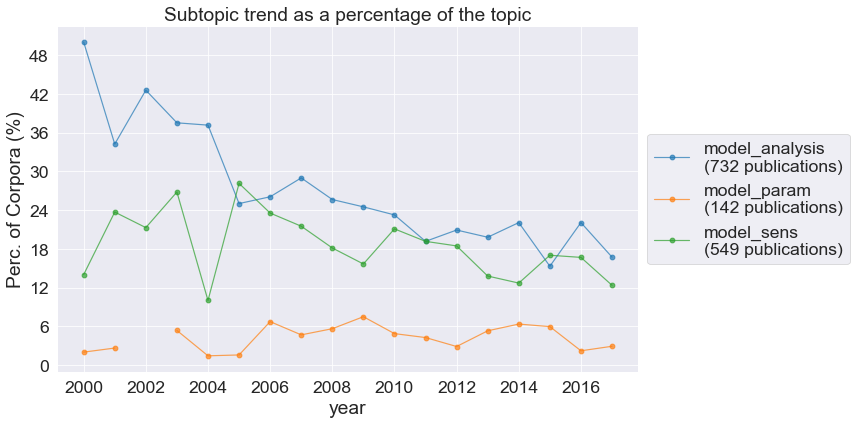

In [22]:
wos_plot.plot_topic_trend([model_analysis_rc, model_param_rc, model_sens_rc], total_rc=topic_4_recs, title='Subtopic trend as a percentage of the topic', save_plot_fn='Subtopic trend percentage')

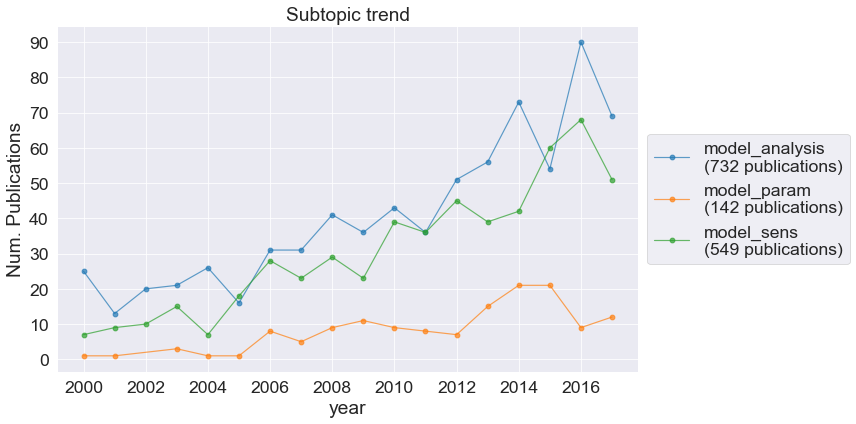

In [23]:
wos_plot.plot_topic_trend([model_analysis_rc, model_param_rc, model_sens_rc], total_rc=None, title='Subtopic trend', save_plot_fn='Subtopic trend')

<hr>
Running keyword match on collated_topics
<hr>
<br> Software

In [24]:
software = wosis.keyword_matches(subtopics_collated, ['software', 'packages'], threshold=95.0)

In [25]:
all_software = software.combine_recs()

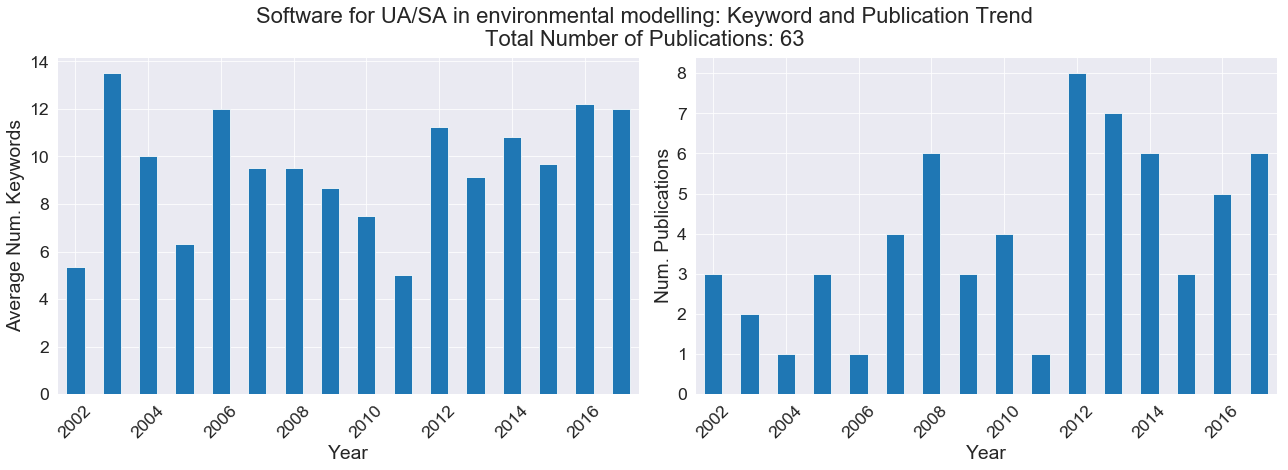

In [26]:
wos_plot.plot_kw_trend(all_software, title='Software for UA/SA in environmental modelling: Keyword and Publication Trend', save_plot_fn='figs/software_pub_trend.png')

<hr>
Frameworks

In [27]:
framework = wosis.keyword_matches(subtopics_collated, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [28]:
all_framework = framework.combine_recs()

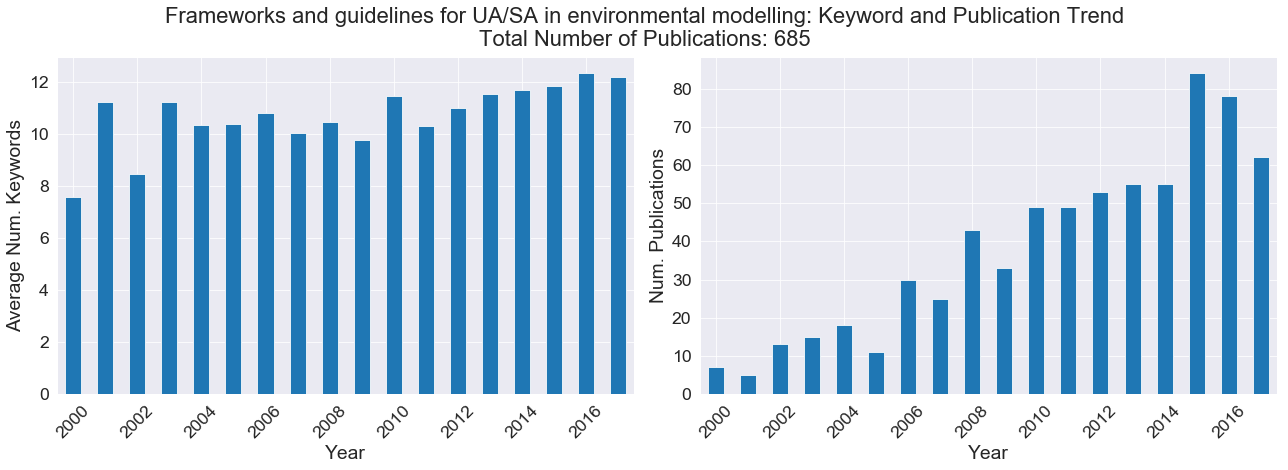

In [29]:
wos_plot.plot_kw_trend(all_framework, title='Frameworks and guidelines for UA/SA in environmental modelling: Keyword and Publication Trend', save_plot_fn='figs/framework_pub_trend.png')

<hr>
Applications

In [30]:
applications = wosis.keyword_matches(subtopics_collated, ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], threshold=95.0)

In [31]:
all_applications = applications.combine_recs()

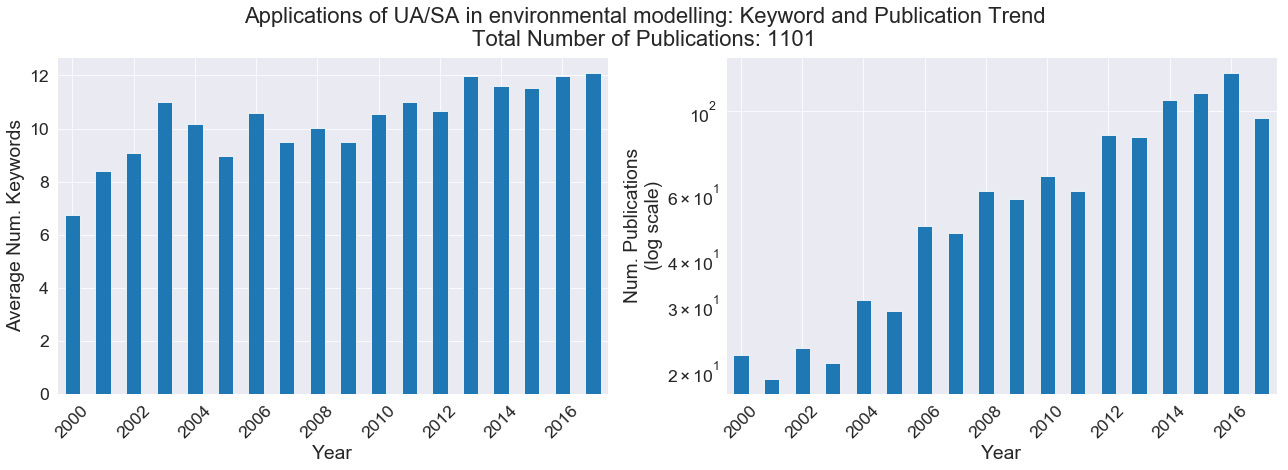

In [32]:
wos_plot.plot_kw_trend(all_applications, title='Applications of UA/SA in environmental modelling: Keyword and Publication Trend', save_plot_fn='figs/app_pub_trend.png')

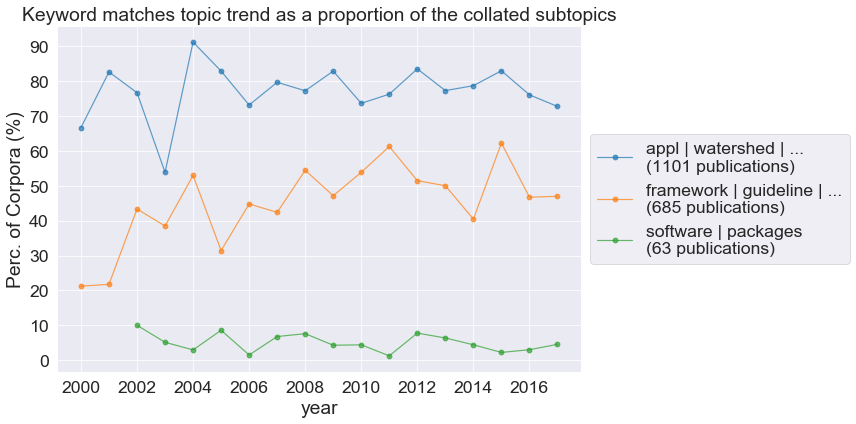

In [33]:
wos_plot.plot_topic_trend([applications, framework, software], total_rc=subtopics_collated, title='Keyword matches topic trend as a proportion of the collated subtopics', save_plot_fn='figs/collated_topics_keyword_trend_percentage.png')

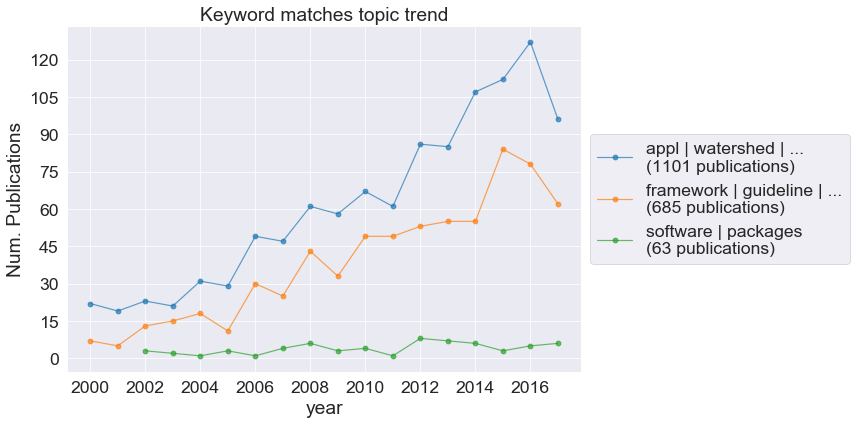

In [34]:
wos_plot.plot_topic_trend([applications, framework, software], title='Keyword matches topic trend', save_plot_fn='figs/collated_topics_keyword_trend.png')

Filter out conferences and journals with less than 3 publications

In [35]:
tmp = wosis.rc_to_df(RC)

In [36]:
grouped_by_journal = tmp.groupby('SO').count()
relevant_journals = grouped_by_journal.loc[grouped_by_journal['id'] > 2].index

unwanted = set(["CONGRESS", "SYMPOSIUM", "CONFERENCE", "WORKSHOP", "PROCEEDINGS"])
leftover_journals = []
for so in relevant_journals:
    add = True
    for kwi in so.split():
        for kw in unwanted:
            if wosis.similarity.string_match(kwi, kw) >= 95:
                add = False
                break
        if not add:
            break
        
    if add:
        leftover_journals.append(so)
        
len(leftover_journals)

357

In [37]:
leftover = tmp[tmp['SO'].isin(leftover_journals)]

In [38]:
no_conf_rc = wosis.extract_recs(leftover.id, RC, 'no_conferences')

In [39]:
all_soft_tmp = wosis.keyword_matches(no_conf_rc, ["software for", "packages", "package for"], threshold=95.0).combine_recs()

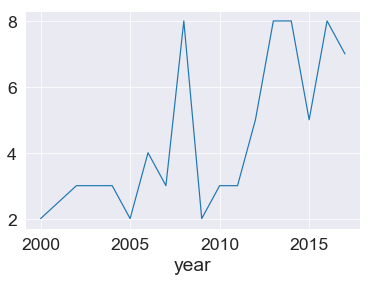

In [40]:
all_soft_df = wosis.rc_to_df(all_soft_tmp)
all_soft_df.groupby('year').count()['AU'].plot()

In [41]:
all_soft_df.to_csv('../data/software_dump.csv')

<hr>
Finding top journals in the collated topics

<hr>
Applications

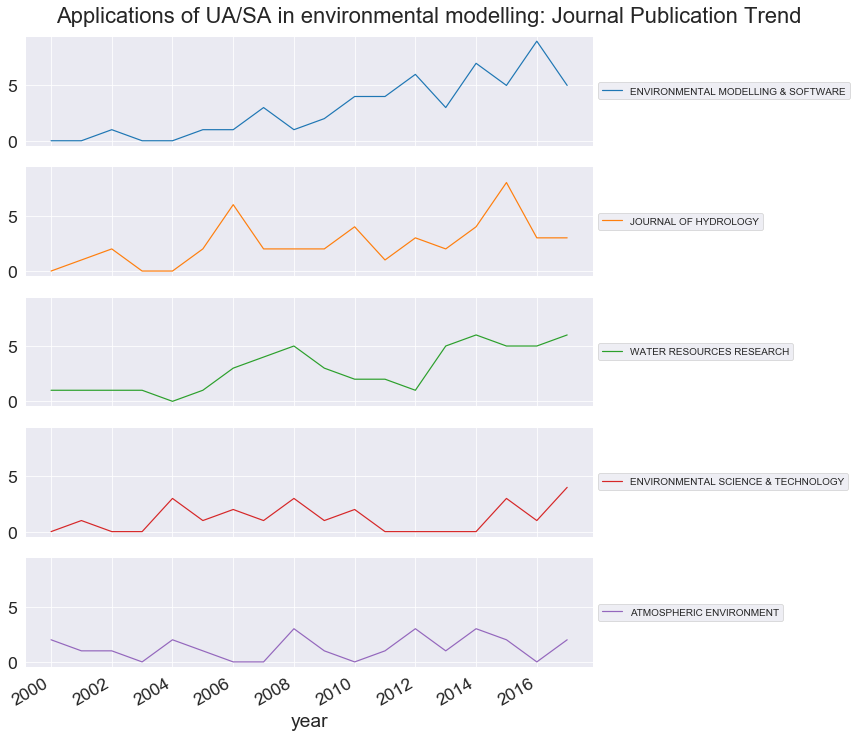

In [42]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, save_plot_fn='figs/applications_journal_pub_trend.png', title='Applications of UA/SA in environmental modelling: Journal Publication Trend')

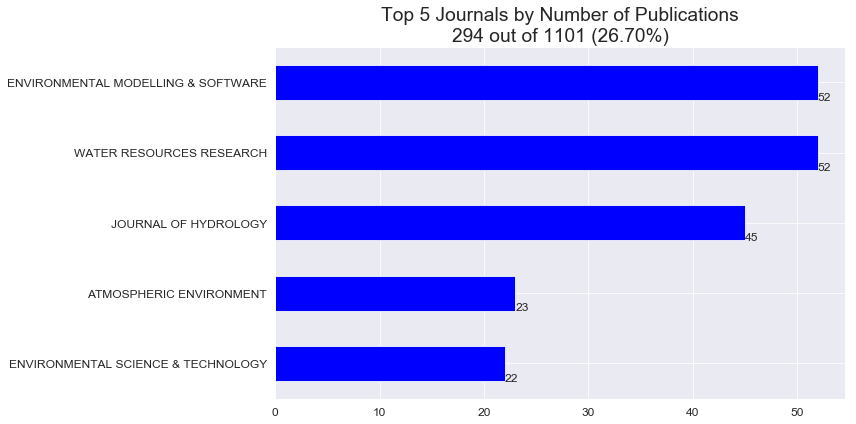

In [43]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/app_journal_pubs.png')

In [46]:
journals_of_interest_app = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Computers & Geosciences'.upper(), 'Stochastic Environmental Research and Risk Assessment'.upper()]
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, journals_of_interest_app)

In [48]:
wos_config = wosis.load_config("config.yml")
data_dir = "trend_3_tmp"  # Using the temporary data directory

# Get citations for each paper
paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5DOwjVjlhhwNSM1L9C1)


Authenticated (SID: 7CZ8AOeMyTVmGhCi2tC)


WebFault: b'Server raised fault: \'Request denied by Throttle server. Request denied for quantity of 1 for activity "Authentication" of service "WS-Authentication" for id "c0bfb9aac3c77faa2351e08ed226bca5.56728" on Friday, January 25, 2019 at 5:20:57 AM UTC.  The following reasons apply:   Reason (1) - limit of 5 requests per period has been exceeded for throttle AUTH-ReqPerPeriod. Details of this throttle are the following : this is a RequestPerPeriod throttle; the period length is 5 minute(s); the period restarts after Friday, January 25, 2019 at 5:20:59 AM UTC.\''

In [ ]:
journal_app = paper_citations_per_journal_app['ENVIRONMENTAL MODELLING & SOFTWARE']

journal_app = journal_app.set_index(journal_app.title)

In [ ]:
journal_app.loc[journal_app.title.str.contains("Uncertainty in the environmental modelling process")]

In [ ]:
wos_plot.plot_citations(journal_app)

In [ ]:
journal_app[['AU', 'year', 'DOI']][0:5]

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)

top_cited_in_top_journals_app.head(10)

In [ ]:
top_cited_in_top_journals_app.to_csv('../data/top_cited_in_top_journals_app.csv', index=False)

In [ ]:
top_cited_in_top_journals_app.groupby('year').count()['AU'].plot()

In [ ]:
all_applications_df = wosis.rec_to_df(all_applications)
topic_results_app = find_topics(all_applications_df, num_topics=5)

In [ ]:
all_applications_df.groupby('year').count()['AU'].plot()

In [ ]:
topic_app_1 = topic_results_app.get_topic_by_id(1)
topic_app_2 = topic_results_app.get_topic_by_id(2)
topic_app_3 = topic_results_app.get_topic_by_id(3)
topic_app_4 = topic_results_app.get_topic_by_id(4)
topic_app_5 = topic_results_app.get_topic_by_id(5)

In [ ]:
topic_app_1.groupby('year').count()['AU'].plot()

In [ ]:
topic_app_2.groupby('year').count()['AU'].plot()

In [ ]:
topic_app_3.groupby('year').count()['AU'].plot()

In [ ]:
topic_app_4.groupby('year').count()['AU'].plot()

In [ ]:
topic_app_5.groupby('year').count()['AU'].plot()

<hr>
Software

In [ ]:
wos_plot.plot_journal_pub_trend(all_software, top_n=5, save_plot_fn='figs/software_journal_pub_trend.png', title='UA/SA software in environmental modelling: Journal Publication Trend')

In [ ]:
wos_plot.plot_pubs_per_journal(all_software, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/software_journal_pubs.png')

In [ ]:
journals_of_interest_software = ['Radiation Protection Dosimetry'.upper(), 'International Journal of Life Cycle Assessment'.upper(), 'Water Science and Technology'.upper(), 'Computers & Geosciences'.upper(), 'Environmental Modelling & Software'.upper()]
pubs_for_journals_software = wosis.find_pubs_by_journal(all_software, journals_of_interest_software)

In [ ]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for pubs in pubs_for_journals_software:
    paper_citations_per_journal_software[pubs] = wosis.get_num_citations(pubs_for_journals_software[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [ ]:
journal_software = paper_citations_per_journal_software['ENVIRONMENTAL MODELLING & SOFTWARE']

journal_software = journal_software.set_index(journal_app.title)

In [ ]:
wos_plot.plot_citations(journal_software)

In [ ]:
journal_software[['AU', 'year', 'DOI']][0:5]

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)

top_cited_in_top_journals_software.head(10)
#top_cited_in_top_journals_software.head(10).groupby('journal').count()

In [ ]:
wosis.rc_to_df(wosis.extract_recs(journal_software.id, RC)).to_csv('dump.csv')

In [ ]:
top_cited_in_top_journals_software

In [ ]:
top_cited_in_top_journals_software.to_csv('../data/top_cited_in_top_journals_software.csv', index=False)

In [ ]:
top_cited_in_top_journals_software.groupby('year').count()['AU'].plot()

In [ ]:
top_cited_in_top_journals_software.columns

<hr>
Framework

In [ ]:
wos_plot.plot_journal_pub_trend(all_framework, top_n=5, save_plot_fn='figs/framework_journal_pub_trend.png', title='Frameworks and guidelines for UA/SA in environmental modelling: Journal Publication Trend')

In [ ]:
wos_plot.plot_pubs_per_journal(all_framework, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/framework_journal_pubs.png')

In [ ]:
journals_of_interest_framework = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Water Resources Research'.upper(), 'Computers & Geosciences'.upper(), 'Advances in Water Resources'.upper()]
pubs_for_journals_framework = wosis.find_pubs_by_journal(all_framework, journals_of_interest_framework)

In [ ]:
# Get citations for each paper
paper_citations_per_journal_framework = {}
for pubs in pubs_for_journals_framework:
    paper_citations_per_journal_framework[pubs] = wosis.get_num_citations(pubs_for_journals_framework[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [ ]:
journal_framework = paper_citations_per_journal_framework['ENVIRONMENTAL MODELLING & SOFTWARE']

journal_framework = journal_framework.set_index(journal_framework.title)

In [ ]:
wos_plot.plot_citations(journal_framework)

In [ ]:
journal_framework[['AU', 'year', 'DOI']][0:5]

In [ ]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_framework = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_framework.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_framework = collection_framework.append(df[cols_of_interest][0:10], ignore_index=True)

In [ ]:
top_cited_in_top_journals_framework = collection_framework.sort_values('citations', ascending=False)

#top_cited_in_top_journals_framework.head(10)
top_cited_in_top_journals_framework.head(10).groupby('journal').count()

In [ ]:
top_cited_in_top_journals_framework.to_csv('../data/top_cited_in_top_journals_framework.csv', index=False)

In [ ]:
top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()

In [ ]:
all_framework_df = wosis.rec_to_df(all_framework)

In [ ]:
all_framework_df.groupby('year').count()['AU'].plot()

In [ ]:
topic_results_frame = find_topics(all_framework_df, num_topics = 5)

In [ ]:
topic_frame_1 = topic_results_frame.get_topic_by_id(1)
topic_frame_2 = topic_results_frame.get_topic_by_id(2)
topic_frame_3 = topic_results_frame.get_topic_by_id(3)
topic_frame_4 = topic_results_frame.get_topic_by_id(4)
topic_frame_5 = topic_results_frame.get_topic_by_id(5)

In [ ]:
topic_frame_1.groupby('year').count()['AU'].plot()

In [ ]:
topic_frame_2.groupby('year').count()['AU'].plot()

In [ ]:
topic_frame_3.groupby('year').count()['AU'].plot()

In [ ]:
topic_frame_4.groupby('year').count()['AU'].plot()

In [ ]:
topic_frame_5.groupby('year').count()['AU'].plot()

<hr>
Network graphs of the 3 subtopics